# 002 - Surface

Code from Paul Butler:
https://bitaesthetics.com/posts/surface-projection.html

In [26]:
import matplotlib.pyplot as plt
from penkit.preview import show_layer
from penkit.write import write_plot
import numpy as np
%matplotlib inline

## Base

In [5]:
def make_joy_texture(num_lines=10, resolution=50):
    # np.meshgrid is a handy way to generate a grid of points. It
    # returns a pair of matrices, which we will flatten into arrays.
    # For the x-coordinates, we put a nan value at the end so that when
    # we flatten them there is a separater between each horizontal line.
    x, y = np.meshgrid(
        np.hstack([np.linspace(0, 1, resolution), np.nan]),
        np.linspace(0, 1, num_lines),
    )
    
    # For coordinates where the x value is nan, set the y value to nan
    # as well. nan coordinates represent breaks in the path, indicating
    # here that the pen should be raised between each horizontal line.
    y[np.isnan(x)] = np.nan
    return x.flatten(), y.flatten()

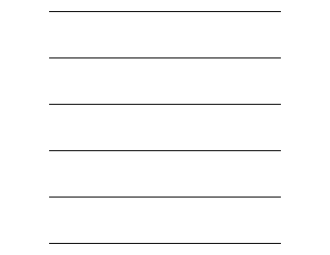

In [6]:
joy_texture = make_joy_texture(6)
show_layer(joy_texture)

## Textura  

In [83]:
from scipy.ndimage.filters import gaussian_filter

# This step isn't necessary, but it ensures that the same "random" plot
# will be generated every time the tutorial is run.
np.random.seed(int('banana', 36))

NOISE_BLUR = 40
noise_surface = gaussian_filter(np.random.normal(size=(500, 500)), NOISE_BLUR)

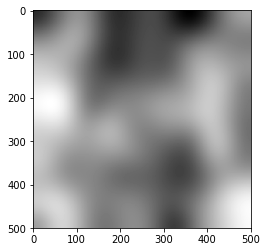

In [84]:
plt.imshow(noise_surface, cmap='gray');

In [82]:
def texture_map(texture, surface):
    texture_x, texture_y = texture
    surface_w, surface_h = surface.shape
    
    # First, we convert the points along the texture into integers within
    # the bounds of the surface's index. The clipping here will also convert
    # the nan values to 0.
    index_x = np.clip(np.int32(surface_w * texture_x), 0, surface_w - 1)
    index_y = np.clip(np.int32(surface_h * texture_y), 0, surface_h - 1)
    
    # Grab z-values along the texture path. Note that this will include values
    # for every point, even if it is nan or had to be clipped to within the
    # bounds of the surface, so we have to fix that next.
    surface_z = surface[index_x, index_y]
    
    # Set z-values that are either out of bounds or nan in the texture to nan
    # in the output.
    # Numpy wants to warn about the fact that there are nan values in the
    # textures, so we silence warnings about this.
    with np.errstate(invalid='ignore'):
        surface_z[(texture_x < 0) | (texture_x >= 1) |
                  (texture_y < 0) | (texture_y >= 1)] = np.nan
    
    return surface_z

In [32]:
def texture_plot(texture, surface, angle=45, **kwargs):
    # Extract the Xs and Ys from the texture
    surface_x, surface_y = texture
    
    # Map the texture to get the Zs
    surface_z = texture_map(texture, surface.T)
    
    # The projection is as simple as linearly blending the Z and Y
    # dimensions. The multiples are calculated from the given
    # angle with standard trig.
    z_coef = np.sin(np.radians(angle))
    y_coef = np.cos(np.radians(angle))
    plot = (surface_x, -surface_y * y_coef + surface_z * z_coef)

    return plot

## Apply

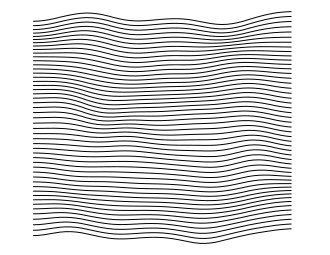

In [85]:
proj = texture_plot(make_joy_texture(50), noise_surface * 3, 30)
show_layer(proj)

## Export

In [67]:
write_plot([proj], '_generated/wave_surface-2.svg')